In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pprint import pprint
#from api_key import eia_api_key
eia_api_key = "7GAy2uMZHd2UXwGYyaoKyDeWSKxo9Mqvg7ehleq5"

In [2]:
# API CALLS
capacity_api_call_2008 = requests.get(f'https://api.eia.gov/v2/electricity/state-electricity-profiles/capability/data/?api_key={eia_api_key}&frequency=annual&data[0]=capability&facets[producertypeid][]=TOT&start=2008&end=2008&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=24000').json()

capacity_api_call_2018 = requests.get(f'https://api.eia.gov/v2/electricity/state-electricity-profiles/capability/data/?api_key={eia_api_key}&frequency=annual&data[0]=capability&facets[producertypeid][]=TOT&start=2018&end=2018&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=24000').json()

key_stats_api_call = requests.get(f'https://api.eia.gov/v2/electricity/state-electricity-profiles/summary/data/?api_key={eia_api_key}&frequency=annual&data[0]=average-retail-price&data[1]=average-retail-price-rank&data[2]=capacity-elec-utilities&data[3]=capacity-elect-utilities-rank&data[4]=capacity-ipp&data[5]=capacity-ipp-rank&data[6]=carbon-dioxide&data[7]=carbon-dioxide-lbs&data[8]=carbon-dioxide-rank&data[9]=carbon-dioxide-rank-lbs&data[10]=direct-use&data[11]=direct-use-rank&data[12]=eop-sales&data[13]=eop-sales-rank&data[14]=fsp-sales-rank&data[15]=fsp-service-provider-sales&data[16]=generation-elect-utils&data[17]=generation-elect-utils-rank&data[18]=generation-ipp&data[19]=generation-ipp-rank&data[20]=net-generation&data[21]=net-generation-rank&data[22]=net-summer-capacity&data[23]=net-summer-capacity-rank&data[24]=nitrogen-oxide&data[25]=nitrogen-oxide-lbs&data[26]=nitrogen-oxide-rank&data[27]=nitrogen-oxide-rank-lbs&data[28]=prime-source&data[29]=sulfer-dioxide&data[30]=sulfer-dioxide-lbs&data[31]=sulfer-dioxide-rank&data[32]=sulfer-dioxide-rank-lbs&data[33]=total-retail-sales&data[34]=total-retail-sales-rank&start=2008&end=2018&sort[0][column]=average-retail-price&sort[0][direction]=asc&offset=0&length=24000').json()


In [3]:
# FOR LOOP TO PULL COLUMNS FROM API FOR KEY STATS
state_key_stats = []

for x in key_stats_api_call['response']['data']:
    key_stats_energy_source = x['prime-source']
    key_stats_state = x['stateDescription']
    key_stats_period = x['period']
    key_stats_avg_price = x['average-retail-price']
    key_stats_carbon_per_mw = x['carbon-dioxide-lbs']
    key_stats_total_carbon = x['carbon-dioxide']
    
    
    state_key_stats.append({"State": key_stats_state,
                            'Year': key_stats_period,
                            'Energy Source': key_stats_energy_source,
                            'Average Price (Cents per KW Hour)': key_stats_avg_price,
                            'CO2 Emissions (lbs per MW Hour)': key_stats_carbon_per_mw,
                            'Total CO2 Emissions (thousand metric tons)': key_stats_total_carbon
        })



In [4]:
# MAKE KEY STATS A DF
df_state_key_stats = pd.DataFrame(state_key_stats)

df_state_key_stats.head()

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,West Virginia,2008,Coal,5.61,2043,84610
1,Wyoming,2008,Coal,5.67,2216,46837
2,Idaho,2008,Hydroelectric,5.69,187,1017
3,Wyoming,2009,Coal,6.08,2136,44684
4,Wyoming,2010,Coal,6.20,2090,45703


In [5]:
# REMOVE D.C FROM STATES
df_clean_state_key_stats = df_state_key_stats.drop(df_state_key_stats[df_state_key_stats['State'].str.contains('District of Columbia') | df_state_key_stats['State'].str.contains('United States')].index,inplace=False)
df_clean_state_key_stats

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,West Virginia,2008,Coal,5.61,2043,84610
1,Wyoming,2008,Coal,5.67,2216,46837
2,Idaho,2008,Hydroelectric,5.69,187,1017
3,Wyoming,2009,Coal,6.08,2136,44684
4,Wyoming,2010,Coal,6.20,2090,45703
...,...,...,...,...,...,...
567,Hawaii,2008,Petroleum,29.20,1750,9048
568,Hawaii,2011,Petroleum,31.59,1662,8100
569,Hawaii,2013,Petroleum,33.26,1592,7428
570,Hawaii,2014,Petroleum,33.43,1606,7448


In [6]:
# SEPARATE KEY STATE STATS BY RELEVANT YEAR
df_2008_state_key_stats = df_clean_state_key_stats.loc[df_clean_state_key_stats['Year'] == 2008]
df_2018_state_key_stats = df_clean_state_key_stats.loc[df_clean_state_key_stats['Year'] == 2018]


df_2008_state_key_stats.reset_index(drop=True, inplace=True)
df_2018_state_key_stats.reset_index(drop=True, inplace=True)

print(stats.ttest_ind(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'], df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'], equal_var=False))
print(stats.ttest_ind(df_2008_state_key_stats['Average Price (Cents per KW Hour)'], df_2018_state_key_stats['Average Price (Cents per KW Hour)'], equal_var=False))
print(stats.ttest_ind(df_2008_state_key_stats['Total CO2 Emissions (thousand metric tons)'], df_2018_state_key_stats['Total CO2 Emissions (thousand metric tons)'], equal_var=False))


Ttest_indResult(statistic=3.164001116363323, pvalue=0.0020794471268320083)
Ttest_indResult(statistic=-1.5260169224455093, pvalue=0.1302315867037622)
Ttest_indResult(statistic=1.4412214282454316, pvalue=0.1528370110765721)


In [7]:
# FIND STATISTIC VALUES FOR AVERAGE PRICE FOR EACH RELEVANT YEAR

# MAXIMUMS
df_2008_max_average_price = df_2008_state_key_stats.loc[(df_2008_state_key_stats['Average Price (Cents per KW Hour)'].idxmax())]
max_average_price_2008 = df_2008_max_average_price['State']
print(f'2008 max average price: {max_average_price_2008}')
df_2018_max_average_price = df_2018_state_key_stats.loc[(df_2018_state_key_stats['Average Price (Cents per KW Hour)'].idxmax())]
max_average_price_2018 = df_2018_max_average_price['State']
print(f'2018 max average price: {max_average_price_2018}')

# MINIMUMS
df_2008_min_average_price = df_2008_state_key_stats.loc[(df_2008_state_key_stats['Average Price (Cents per KW Hour)'].idxmin())]
min_average_price_2008 = df_2008_min_average_price['State']
print(f'2008 min average price: {min_average_price_2008}')
df_2018_min_average_price = df_2018_state_key_stats.loc[(df_2018_state_key_stats['Average Price (Cents per KW Hour)'].idxmin())]
min_average_price_2018 = df_2018_min_average_price['State']
print(f'2018 min average price: {min_average_price_2018}')

# MEDIANS WITH 1ST PRINT LINE USED TO FIND LOCATION OF STATE(S) WITH MEDIAN VALUE(S)
#print(df_2008_state_key_stats['Average Price (Cents per KW Hour)'].median())
df_2008_median_average_price = df_2008_state_key_stats.loc[24:25, :]
median_average_price_2008 = df_2008_median_average_price['State']
print(f'2008 median average price:') 
print(f'{median_average_price_2008}')

# #print(df_2018_state_key_stats['Average Price (Cents per KW Hour)'].median())
df_2018_median_average_price = df_2018_state_key_stats.loc[24:25, :]
median_average_price_2018 = df_2018_median_average_price['State']
print(f'2018 median average price:') 
print(f'{median_average_price_2018}')


# MEANS WITH 1ST PRINT LINE USED TO FIND LOCATION OF STATE(S) WITH MEAN VALUE(S)
# print(df_2008_state_key_stats['Average Price (Cents per KW Hour)'].mean())
df_2008_mean_average_price = df_2008_state_key_stats.loc[34, :]
mean_average_price_2008 = df_2008_mean_average_price['State']
print(f'2008 mean average price: {mean_average_price_2008}')
# #print(df_2018_state_key_stats['Average Price (Cents per KW Hour)'].mean())
df_2018_mean_average_price = df_2018_state_key_stats.loc[37, :]
mean_average_price_2018 = df_2018_mean_average_price['State']
print(f'2018 mean average price: {mean_average_price_2018}')

2008 max average price: Hawaii
2018 max average price: Hawaii
2008 min average price: West Virginia
2018 min average price: Louisiana
2008 median average price:
24    Colorado
25     Alabama
Name: State, dtype: object
2018 median average price:
24    South Carolina
25           Indiana
Name: State, dtype: object
2008 mean average price: Nevada
2018 mean average price: Michigan


In [8]:
# FIND STATISTIC VALUES FOR CO2 EMISSIONS BY POUNDS PER MEGAWAT HOUR FOR EACH RELEVANT YEAR

# MAXIMUMS
df_2008_max_co2_emissions = df_2008_state_key_stats.loc[(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'].idxmax())]
max_co2_emissions_2008 = df_2008_max_co2_emissions['State']
print(f'2008 max co2 emissions: {max_co2_emissions_2008}')
df_2018_max_co2_emissions = df_2018_state_key_stats.loc[(df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'].idxmax())]
max_co2_emissions_2018 = df_2018_max_co2_emissions['State']
print(f'2018 max co2 emissions: {max_co2_emissions_2018}')

# MINIMUMS
df_2008_min_co2_emissions = df_2008_state_key_stats.loc[(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'].idxmin())]
min_co2_emissions_2008 = df_2008_min_co2_emissions['State']
print(f'2008 min co2 emissions: {min_co2_emissions_2008}')
df_2018_min_co2_emissions = df_2018_state_key_stats.loc[(df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'].idxmin())]
min_co2_emissions_2018 = df_2018_min_co2_emissions['State']
print(f'2018 min co2 emissions: {min_co2_emissions_2018}')

# MEDIANS WITH 1ST PRINT LINE USED TO FIND LOCATION OF STATE(S) WITH MEDIAN VALUE(S)
#print(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'].median())
df_2008_median_co2_emissions = df_2008_state_key_stats.loc[[19, 40], 'State']
print(f'2008 median co2 emissions:') 
print(f'{df_2008_median_co2_emissions}')

#print(df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'].median())
df_2018_median_co2_emissions = df_2018_state_key_stats.loc[[36, 22], :]
median_co2_emissions_2018 = pd.DataFrame(df_2018_median_co2_emissions['State'])
print(f'2018 median co2 emissions:') 
print(f'{median_co2_emissions_2018}')

# MEANS WITH 1ST PRINT LINE USED TO FIND LOCATION OF STATE(S) WITH MEAN VALUE(S)
#print(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'].mean())
df_2008_mean_co2_emissions = df_2008_state_key_stats.loc[19, :]
mean_co2_emissions_2008 = df_2008_mean_co2_emissions['State']
print(f'2008 mean co2 emissions: {mean_co2_emissions_2008}')
#print(df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'].mean())
df_2018_mean_co2_emissions = df_2018_state_key_stats.loc[35, :]
mean_co2_emissions_2018 = df_2018_mean_co2_emissions['State']
print(f'2008 mean co2 emissions: {mean_co2_emissions_2008}')

2008 max co2 emissions: Wyoming
2018 max co2 emissions: Wyoming
2008 min co2 emissions: Vermont
2018 min co2 emissions: Vermont
2008 median co2 emissions:
19    North Carolina
40          Maryland
Name: State, dtype: object
2018 median co2 emissions:
      State
36  Arizona
22  Georgia
2008 mean co2 emissions: North Carolina
2008 mean co2 emissions: North Carolina


In [10]:
# COMBINE RELEVANT YEARS CLEAN KEY STATE STATS

df_combined_state_key_stats = df_2008_state_key_stats.merge(df_2018_state_key_stats, how='outer')

df_combined_state_key_stats.head(100)


,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,West Virginia,2008,Coal,5.61,2043,84610
1,Wyoming,2008,Coal,5.67,2216,46837
2,Idaho,2008,Hydroelectric,5.69,187,1017
3,Kentucky,2008,Coal,6.26,2114,94028
4,Utah,2008,Coal,6.49,1860,39381
...,...,...,...,...,...,...
95,Rhode Island,2018,Natural Gas,18.10,879,3348
96,Connecticut,2018,Natural Gas,18.41,535,9591
97,Massachusetts,2018,Natural Gas,18.50,808,9976
98,Alaska,2018,Natural Gas,19.36,1194,3390


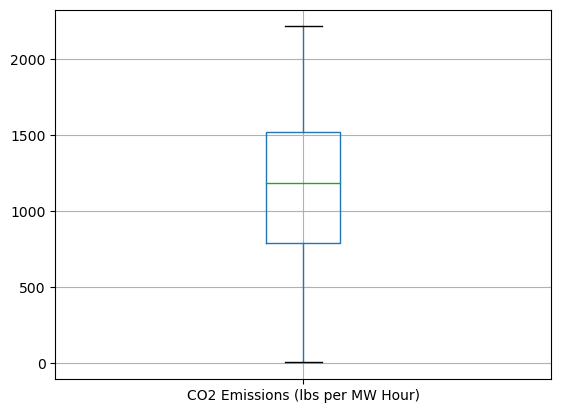

In [12]:
# COMBINED YEARS CO2 EMISSIONS BOX PLOT

df_combined_state_key_stats.boxplot(column=['CO2 Emissions (lbs per MW Hour)'])
plt.show()

In [13]:
# FIND POTENTIAL OUTLIERS FOR CO2 EMISSIONS

co2_quartiles = df_combined_state_key_stats['CO2 Emissions (lbs per MW Hour)'].quantile([.25,.5,.75])
co2_lowerq = co2_quartiles[0.25]
co2_upperq = co2_quartiles[0.75]
co2_iqr = co2_upperq-co2_lowerq
co2_lower_bound = co2_lowerq - (1.5*co2_iqr)
co2_upper_bound = co2_upperq + (1.5*co2_iqr)

print(f"The combined year median of Average Price (Cents per KW Hour) is: {co2_quartiles[0.5]}")
print(f"Values below {co2_lower_bound} could be outliers.")
print(f"Values above {co2_upper_bound} could be outliers.")


The combined year median of Average Price (Cents per KW Hour) is: 1186.0
Values below -308.0 could be outliers.
Values above 2618.0 could be outliers.


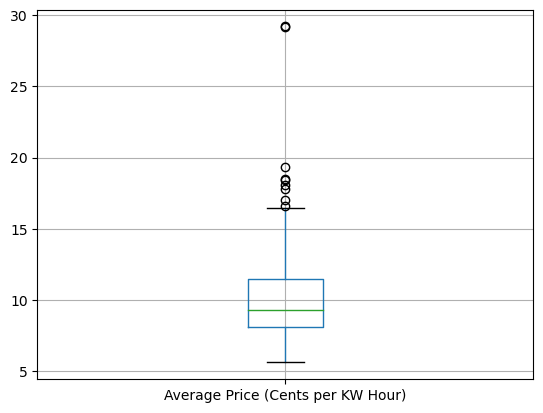

In [14]:
# COMBINED YEARS AVERAGE PRICE BOX PLOT

df_combined_state_key_stats.boxplot(column=['Average Price (Cents per KW Hour)'])
plt.show()

In [15]:
# FIND POTENTIAL OUTLIERS FOR AVERAGE PRICE

price_quartiles = df_combined_state_key_stats['Average Price (Cents per KW Hour)'].quantile([.25,.5,.75])
price_lowerq = price_quartiles[0.25]
price_upperq = price_quartiles[0.75]
price_iqr = price_upperq-price_lowerq
price_lower_bound = price_lowerq - (1.5*price_iqr)
price_upper_bound = price_upperq + (1.5*price_iqr)

print(f"The combined year median of Average Price (Cents per KW Hour) is: {price_quartiles[0.5]}")
print(f"Values below {price_lower_bound} could be outliers.")
print(f"Values above {price_upper_bound} could be outliers.")

The combined year median of Average Price (Cents per KW Hour) is: 9.29
Values below 3.0612499999999985 could be outliers.
Values above 16.47125 could be outliers.


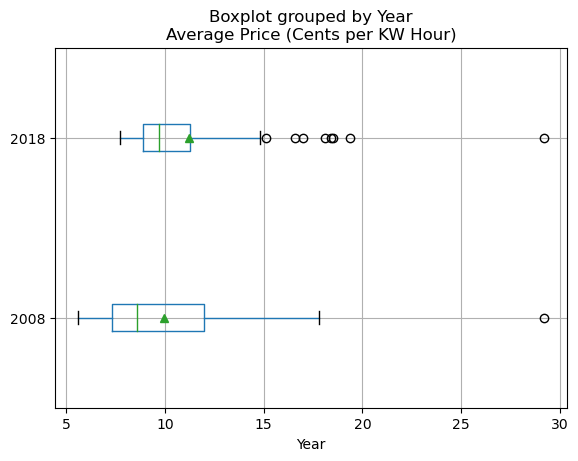

In [16]:
# BOX PLOTS FOR AVERAGE PRICE BY YEAR

df_combined_state_key_stats.boxplot(column=['Average Price (Cents per KW Hour)'], by='Year', showmeans = True, vert=False)

plt.show()

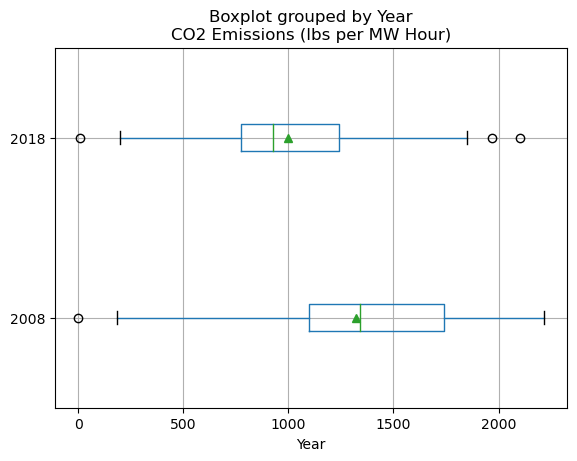

In [17]:
# BOX PLOTS FOR CO2 EMISSIONS BY YEAR

df_combined_state_key_stats.boxplot(column=['CO2 Emissions (lbs per MW Hour)'], by='Year', showmeans = True, vert=False)
plt.show()

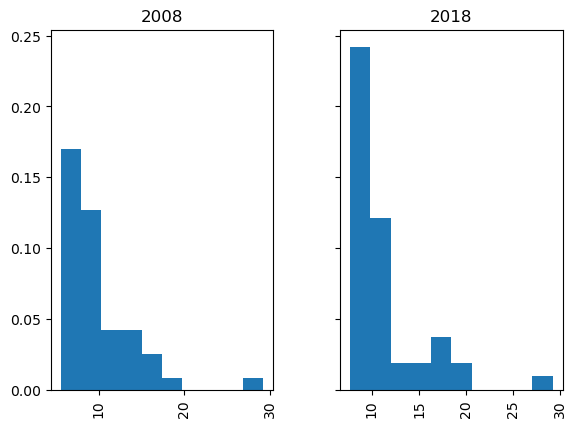

In [18]:
# HISTOGRAM TO COMPARE AVERAGE PRICE BY YEAR

df_combined_state_key_stats.hist(column=['Average Price (Cents per KW Hour)'], by='Year', density=True, sharey=True)
plt.show()

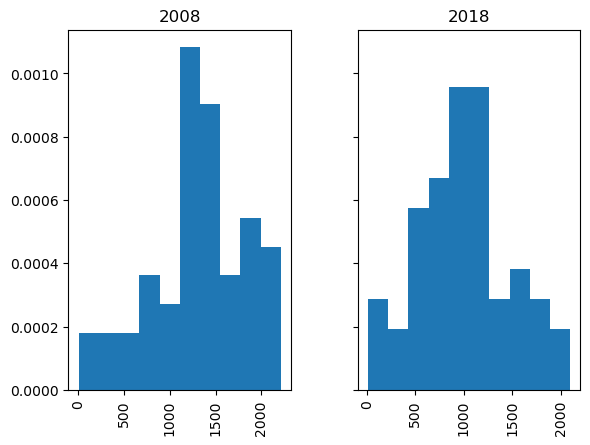

In [19]:
# HISTOGRAM TO COMPARE CO2 EMISSIONS BY YEAR

df_combined_state_key_stats.hist(column=['CO2 Emissions (lbs per MW Hour)'], by='Year', density=True, sharey=True)
plt.show()

In [43]:
# SORT CO2 EMISSIONS IN 2008

df_2008_state_key_stats.sort_values(by='CO2 Emissions (lbs per MW Hour)').reset_index(drop=True)


,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,Vermont,2008,Nuclear,12.33,2,7
1,Idaho,2008,Hydroelectric,5.69,187,1017
2,Washington,2008,Hydroelectric,6.55,272,13686
3,Oregon,2008,Hydroelectric,7.24,405,10821
4,New Hampshire,2008,Nuclear,14.63,652,6782
5,California,2008,Natural Gas,12.49,662,62549
6,Connecticut,2008,Nuclear,17.80,684,9451
7,Maine,2008,Natural Gas,13.80,684,5314
8,New Jersey,2008,Nuclear,14.43,694,20097
9,New York,2008,Natural Gas,16.47,739,47157


In [21]:
# SORT AVERAGE PRICE IN 2008

df_2008_state_key_stats.sort_values(by='Average Price (Cents per KW Hour)')

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,West Virginia,2008,Coal,5.61,2043,84610
1,Wyoming,2008,Coal,5.67,2216,46837
2,Idaho,2008,Hydroelectric,5.69,187,1017
3,Kentucky,2008,Coal,6.26,2114,94028
4,Utah,2008,Coal,6.49,1860,39381
5,Washington,2008,Hydroelectric,6.55,272,13686
6,Nebraska,2008,Coal,6.58,1526,22460
7,North Dakota,2008,Coal,6.69,2210,32887
8,Missouri,2008,Coal,6.84,1877,77650
9,Iowa,2008,Coal,6.89,1912,46137


In [22]:
# SORT AVERAGE PRICE IN 2018

df_2018_state_key_stats.sort_values(by='Average Price (Cents per KW Hour)')

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,Louisiana,2018,Natural Gas,7.71,1094,50770
1,Arkansas,2018,Coal,7.78,1241,38349
2,Washington,2018,Hydroelectric,8.00,201,10661
3,Wyoming,2018,Coal,8.09,2100,44014
4,Oklahoma,2018,Natural Gas,8.09,880,34476
5,Idaho,2018,Hydroelectric,8.17,214,1766
6,Utah,2018,Coal,8.21,1595,28544
7,Texas,2018,Natural Gas,8.48,1060,230076
8,Kentucky,2018,Coal,8.52,1850,66267
9,Nevada,2018,Natural Gas,8.67,777,14005


In [44]:
# SORT CO2 EMISSIONS IN 2018
df_2018_state_key_stats.sort_values(by='Total CO2 Emissions (thousand metric tons)').reset_index(drop=True)


,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,Vermont,2018,Hydroelectric,15.13,10,10
1,Washington,2018,Hydroelectric,8.00,201,10661
2,Idaho,2018,Hydroelectric,8.17,214,1766
3,New Hampshire,2018,Nuclear,17.01,282,2191
4,Oregon,2018,Hydroelectric,8.85,302,8800
5,Maine,2018,Hydroelectric,13.44,429,2202
6,New York,2018,Natural Gas,14.83,464,27936
7,California,2018,Natural Gas,16.58,491,43579
8,South Dakota,2018,Hydroelectric,9.97,509,2921
9,Connecticut,2018,Natural Gas,18.41,535,9591


In [47]:
df_2008_state_key_stats.sort_values(by='Total CO2 Emissions (thousand metric tons)').reset_index(drop=True)

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,Vermont,2008,Nuclear,12.33,2,7
1,Idaho,2008,Hydroelectric,5.69,187,1017
2,Rhode Island,2008,Natural Gas,16.04,890,2988
3,South Dakota,2008,Coal,7.14,1254,4038
4,Alaska,2008,Natural Gas,14.74,1421,4376
5,Maine,2008,Natural Gas,13.80,684,5314
6,Delaware,2008,Coal,12.38,1929,6597
7,New Hampshire,2008,Nuclear,14.63,652,6782
8,Hawaii,2008,Petroleum,29.20,1750,9048
9,Connecticut,2008,Nuclear,17.80,684,9451


In [46]:
df_2018_state_key_stats.sort_values(by='Total CO2 Emissions (thousand metric tons)').reset_index(drop=True)


,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,Vermont,2018,Hydroelectric,15.13,10,10
1,Idaho,2018,Hydroelectric,8.17,214,1766
2,New Hampshire,2018,Nuclear,17.01,282,2191
3,Maine,2018,Hydroelectric,13.44,429,2202
4,South Dakota,2018,Hydroelectric,9.97,509,2921
5,Delaware,2018,Natural Gas,10.55,1126,3193
6,Rhode Island,2018,Natural Gas,18.10,879,3348
7,Alaska,2018,Natural Gas,19.36,1194,3390
8,Hawaii,2018,Petroleum,29.18,1616,7197
9,Oregon,2018,Hydroelectric,8.85,302,8800


In [48]:
# GET DELTA VALUES BY STATE TO MAKE PERCENT CHANGE GRAPHS

df_combinded_state_key_stats_deltas = pd.merge(df_2008_state_key_stats, df_2018_state_key_stats, on = ['State'], how = 'outer')
df_combinded_state_key_stats_deltas
df_combinded_state_key_stats_deltas.drop(columns = ['Year_x', 'Energy Source_x', 'Energy Source_y', 'Year_y'], inplace=True)
df_combinded_state_key_stats_deltas = df_combinded_state_key_stats_deltas.assign(change_in_avg_price = lambda x: x['Average Price (Cents per KW Hour)_y'] - x['Average Price (Cents per KW Hour)_x'])
df_combinded_state_key_stats_deltas = df_combinded_state_key_stats_deltas.assign(per_change_in_avg_price = lambda x: x['Average Price (Cents per KW Hour)_y'] / x['Average Price (Cents per KW Hour)_x'] - 1)
df_combinded_state_key_stats_deltas = df_combinded_state_key_stats_deltas.assign(change_in_co2_lbs = lambda x: x['CO2 Emissions (lbs per MW Hour)_y'] - x['CO2 Emissions (lbs per MW Hour)_x'])
df_combinded_state_key_stats_deltas = df_combinded_state_key_stats_deltas.assign(per_change_in_co2_lbs = lambda x: x['CO2 Emissions (lbs per MW Hour)_y'] / x['CO2 Emissions (lbs per MW Hour)_x']-1)
df_combinded_state_key_stats_deltas = df_combinded_state_key_stats_deltas.assign(change_in_co2_net = lambda x: x['Total CO2 Emissions (thousand metric tons)_y'] - x['Total CO2 Emissions (thousand metric tons)_x'])
df_combinded_state_key_stats_deltas = df_combinded_state_key_stats_deltas.assign(per_change_in_co2_net = lambda x: x['Total CO2 Emissions (thousand metric tons)_y'] / x['Total CO2 Emissions (thousand metric tons)_x']-1)
df_combinded_state_key_stats_deltas.rename(columns = {'Average Price (Cents per KW Hour)_x': '2008 Average Price (Cents per KW Hour)',
                                                      'Average Price (Cents per KW Hour)_y': '2018 Average Price (Cents per KW Hour)',
                                                      'change_in_avg_price': 'Change in Average Price (Cents per KW Hour)',
                                                      'per_change_in_avg_price': 'Percent Change in Average Price (Cents per KW Hour)',
                                                      'CO2 Emissions (lbs per MW Hour)_x': '2008 CO2 Emissions (lbs per MW Hour)',
                                                      'CO2 Emissions (lbs per MW Hour)_y': '2018 CO2 Emissions (lbs per MW Hour)',
                                                      'change_in_co2_lbs': 'Change in CO2 Emissions(lbs per MW Hour)',
                                                      'per_change_in_co2_lbs': 'Percent Change in CO2 Emissions(lbs per MW Hour)',
                                                      'Total CO2 Emissions (thousand metric tons)_x': '2008 Total CO2 Emissions (thousand metric tons)',
                                                      'Total CO2 Emissions (thousand metric tons)_y': '2018 Total CO2 Emissions (thousand metric tons)',
                                                      'change_in_co2_net': 'Change in Total CO2 Emissions (thousand metric tons)',
                                                      'per_change_in_co2_net': 'Percent Change in Total CO2 Emissions (thousand metric tons)'}
                                ,inplace=True)
df_combinded_state_key_stats_deltas = df_combinded_state_key_stats_deltas[['State','2008 Average Price (Cents per KW Hour)','2018 Average Price (Cents per KW Hour)','Change in Average Price (Cents per KW Hour)','Percent Change in Average Price (Cents per KW Hour)',
                                                                           '2008 CO2 Emissions (lbs per MW Hour)','2018 CO2 Emissions (lbs per MW Hour)','Change in CO2 Emissions(lbs per MW Hour)', 'Percent Change in CO2 Emissions(lbs per MW Hour)',
                                                                           '2008 Total CO2 Emissions (thousand metric tons)','2018 Total CO2 Emissions (thousand metric tons)','Change in Total CO2 Emissions (thousand metric tons)','Percent Change in Total CO2 Emissions (thousand metric tons)']]
df_combinded_state_key_stats_deltas

,State,2008 Average Price (Cents per KW Hour),2018 Average Price (Cents per KW Hour),Change in Average Price (Cents per KW Hour),Percent Change in Average Price (Cents per KW Hour),2008 CO2 Emissions (lbs per MW Hour),2018 CO2 Emissions (lbs per MW Hour),Change in CO2 Emissions(lbs per MW Hour),Percent Change in CO2 Emissions(lbs per MW Hour),2008 Total CO2 Emissions (thousand metric tons),2018 Total CO2 Emissions (thousand metric tons),Change in Total CO2 Emissions (thousand metric tons),Percent Change in Total CO2 Emissions (thousand metric tons)
0,West Virginia,5.61,8.72,3.11,0.554367,2043,1970,-73,-0.035732,84610,60203,-24407,-0.288465
1,Wyoming,5.67,8.09,2.42,0.426808,2216,2100,-116,-0.052347,46837,44014,-2823,-0.060273
2,Idaho,5.69,8.17,2.48,0.435852,187,214,27,0.144385,1017,1766,749,0.736480
3,Kentucky,6.26,8.52,2.26,0.361022,2114,1850,-264,-0.124882,94028,66267,-27761,-0.295242
4,Utah,6.49,8.21,1.72,0.265023,1860,1595,-265,-0.142473,39381,28544,-10837,-0.275183
5,Washington,6.55,8.00,1.45,0.221374,272,201,-71,-0.261029,13686,10661,-3025,-0.221029
6,Nebraska,6.58,9.02,2.44,0.370821,1526,1519,-7,-0.004587,22460,25525,3065,0.136465
7,North Dakota,6.69,8.91,2.22,0.331839,2210,1615,-595,-0.269231,32887,31282,-1605,-0.048803
8,Missouri,6.84,9.93,3.09,0.451754,1877,1697,-180,-0.095898,77650,65623,-12027,-0.154887
9,Iowa,6.89,8.92,2.03,0.294630,1912,1189,-723,-0.378138,46137,34253,-11884,-0.257581


In [49]:
# SORT DELTA STATS BY PERCENT CHANGE IN AVERAGE PRICE IN ASCENDING ORDER

df_combinded_state_key_stats_deltas.sort_values(by='Percent Change in Average Price (Cents per KW Hour)').reset_index(drop=True)

,State,2008 Average Price (Cents per KW Hour),2018 Average Price (Cents per KW Hour),Change in Average Price (Cents per KW Hour),Percent Change in Average Price (Cents per KW Hour),2008 CO2 Emissions (lbs per MW Hour),2018 CO2 Emissions (lbs per MW Hour),Change in CO2 Emissions(lbs per MW Hour),Percent Change in CO2 Emissions(lbs per MW Hour),2008 Total CO2 Emissions (thousand metric tons),2018 Total CO2 Emissions (thousand metric tons),Change in Total CO2 Emissions (thousand metric tons),Percent Change in Total CO2 Emissions (thousand metric tons)
0,Texas,10.99,8.48,-2.51,-0.228389,1373,1060,-313,-0.227968,252710,230076,-22634,-0.089565
1,Louisiana,9.44,7.71,-1.73,-0.183263,1302,1094,-208,-0.159754,54736,50770,-3966,-0.072457
2,Delaware,12.38,10.55,-1.83,-0.147819,1929,1126,-803,-0.416278,6597,3193,-3404,-0.515992
3,Nevada,9.89,8.67,-1.22,-0.123357,1138,777,-361,-0.317223,18144,14005,-4139,-0.228119
4,Maryland,13.01,11.57,-1.44,-0.110684,1354,896,-458,-0.338257,29155,17839,-11316,-0.388132
5,New York,16.47,14.83,-1.64,-0.099575,739,464,-275,-0.372124,47157,27936,-19221,-0.407596
6,New Jersey,14.43,13.23,-1.20,-0.083160,694,554,-140,-0.201729,20097,18912,-1185,-0.058964
7,Florida,10.74,10.32,-0.42,-0.039106,1213,971,-242,-0.199505,121052,107792,-13260,-0.109540
8,Maine,13.80,13.44,-0.36,-0.026087,684,429,-255,-0.372807,5314,2202,-3112,-0.585623
9,Hawaii,29.20,29.18,-0.02,-0.000685,1750,1616,-134,-0.076571,9048,7197,-1851,-0.204576


In [50]:
# SORT DELTA STATS BY PERCENT CHANGE IN CO2 EMISSIONS (LBS PER MW HOUR) IN ASCENDING ORDER

df_combinded_state_key_stats_deltas.sort_values(by='Percent Change in CO2 Emissions(lbs per MW Hour)').reset_index(drop=True)

,State,2008 Average Price (Cents per KW Hour),2018 Average Price (Cents per KW Hour),Change in Average Price (Cents per KW Hour),Percent Change in Average Price (Cents per KW Hour),2008 CO2 Emissions (lbs per MW Hour),2018 CO2 Emissions (lbs per MW Hour),Change in CO2 Emissions(lbs per MW Hour),Percent Change in CO2 Emissions(lbs per MW Hour),2008 Total CO2 Emissions (thousand metric tons),2018 Total CO2 Emissions (thousand metric tons),Change in Total CO2 Emissions (thousand metric tons),Percent Change in Total CO2 Emissions (thousand metric tons)
0,South Dakota,7.14,9.97,2.83,0.396359,1254,509,-745,-0.594099,4038,2921,-1117,-0.276622
1,New Hampshire,14.63,17.01,2.38,0.162679,652,282,-370,-0.567485,6782,2191,-4591,-0.676939
2,Tennessee,8.18,9.58,1.40,0.171149,1424,790,-634,-0.445225,58671,29303,-29368,-0.500554
3,Oklahoma,7.81,8.09,0.28,0.035851,1539,880,-659,-0.428200,53400,34476,-18924,-0.354382
4,Kansas,7.45,10.72,3.27,0.438926,1760,1010,-750,-0.426136,37315,23748,-13567,-0.363580
5,Delaware,12.38,10.55,-1.83,-0.147819,1929,1126,-803,-0.416278,6597,3193,-3404,-0.515992
6,North Carolina,7.96,9.25,1.29,0.162060,1324,814,-510,-0.385196,75344,49642,-25702,-0.341129
7,Virginia,8.00,9.48,1.48,0.185000,1253,772,-481,-0.383879,41402,33504,-7898,-0.190764
8,Iowa,6.89,8.92,2.03,0.294630,1912,1189,-723,-0.378138,46137,34253,-11884,-0.257581
9,Maine,13.80,13.44,-0.36,-0.026087,684,429,-255,-0.372807,5314,2202,-3112,-0.585623


In [51]:
# SORT DELTA STATS BY PERCENT CHANGE IN TOTAL CO2 EMISSIONS (THOUSAND METRIC TONS) IN ASCENDING ORDER

df_combinded_state_key_stats_deltas.sort_values(by='Percent Change in Total CO2 Emissions (thousand metric tons)').reset_index(drop=True)

,State,2008 Average Price (Cents per KW Hour),2018 Average Price (Cents per KW Hour),Change in Average Price (Cents per KW Hour),Percent Change in Average Price (Cents per KW Hour),2008 CO2 Emissions (lbs per MW Hour),2018 CO2 Emissions (lbs per MW Hour),Change in CO2 Emissions(lbs per MW Hour),Percent Change in CO2 Emissions(lbs per MW Hour),2008 Total CO2 Emissions (thousand metric tons),2018 Total CO2 Emissions (thousand metric tons),Change in Total CO2 Emissions (thousand metric tons),Percent Change in Total CO2 Emissions (thousand metric tons)
0,New Hampshire,14.63,17.01,2.38,0.162679,652,282,-370,-0.567485,6782,2191,-4591,-0.676939
1,Maine,13.80,13.44,-0.36,-0.026087,684,429,-255,-0.372807,5314,2202,-3112,-0.585623
2,Massachusetts,16.23,18.50,2.27,0.139864,1152,808,-344,-0.298611,22263,9976,-12287,-0.551902
3,Delaware,12.38,10.55,-1.83,-0.147819,1929,1126,-803,-0.416278,6597,3193,-3404,-0.515992
4,Tennessee,8.18,9.58,1.40,0.171149,1424,790,-634,-0.445225,58671,29303,-29368,-0.500554
5,New York,16.47,14.83,-1.64,-0.099575,739,464,-275,-0.372124,47157,27936,-19221,-0.407596
6,New Mexico,8.35,9.35,1.00,0.119760,1837,1242,-595,-0.323898,30899,18442,-12457,-0.403152
7,Ohio,8.39,9.94,1.55,0.184744,1851,1361,-490,-0.264722,129061,78051,-51010,-0.395239
8,Georgia,8.84,9.62,0.78,0.088235,1450,933,-517,-0.356552,89750,54803,-34947,-0.389382
9,Maryland,13.01,11.57,-1.44,-0.110684,1354,896,-458,-0.338257,29155,17839,-11316,-0.388132


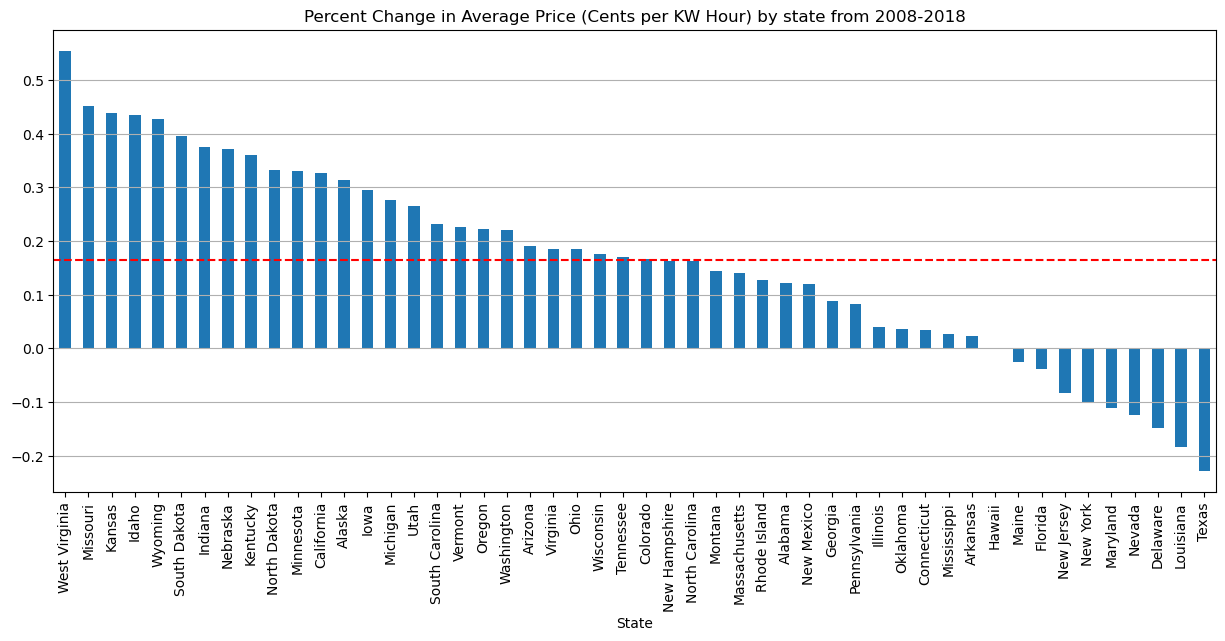

In [84]:
# BAR CHART TO SEE EACH STATE'S PERCENT CHANGE IN AVERAGE PRICE OVER TIME PERIOD
# ADD A LINE TO VISUALIZE THE MEAN

df_combinded_state_key_stats_deltas = df_combinded_state_key_stats_deltas.sort_values(by='Percent Change in Average Price (Cents per KW Hour)', ascending=False)

df_combinded_state_key_stats_deltas.plot(kind = 'bar',x='State' ,y = 'Percent Change in Average Price (Cents per KW Hour)', title = 'Percent Change in Average Price (Cents per KW Hour) by state from 2008-2018', grid=False, figsize= [15,6], legend=False).grid(axis='y')

plt.axhline(y= np.nanmean(df_combinded_state_key_stats_deltas['Percent Change in Average Price (Cents per KW Hour)']), color = 'red', linestyle = '--')

plt.show()

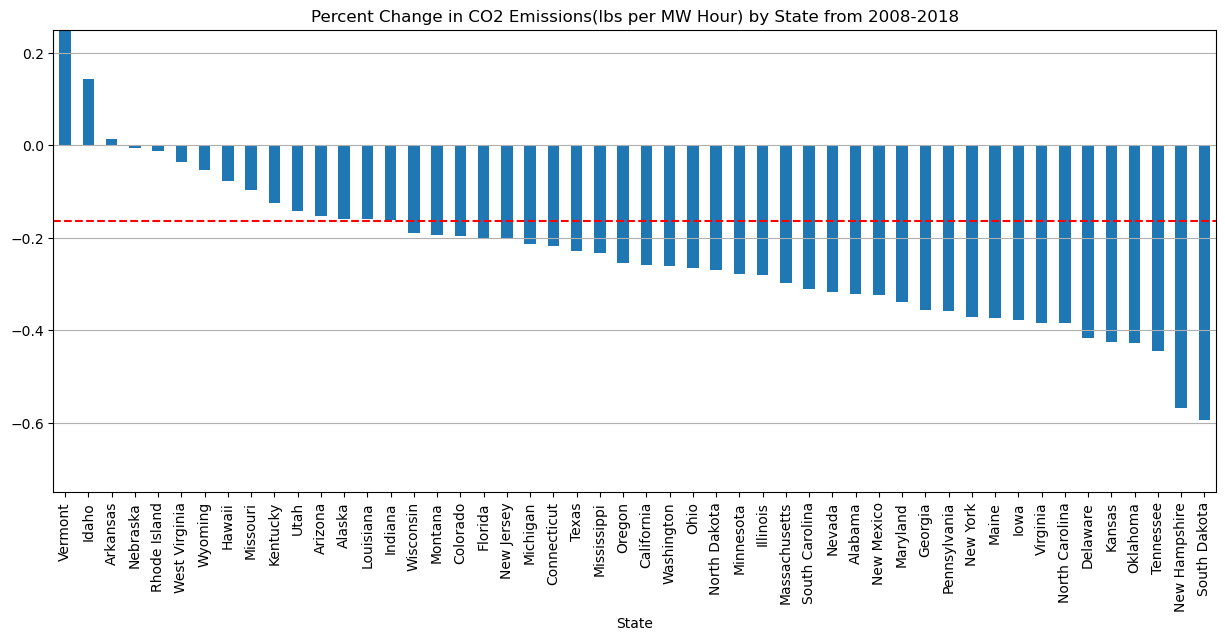

In [85]:
# BAR CHART TO SEE EACH STATE'S PERCENT CHANGE IN CO2 EMISSIONS (LBS PER MW HOUR) OVER TIME PERIOD
# ADD A LINE TO VISUALIZE THE MEAN

df_combinded_state_key_stats_deltas = df_combinded_state_key_stats_deltas.sort_values(by='Percent Change in CO2 Emissions(lbs per MW Hour)', ascending=False)

df_combinded_state_key_stats_deltas.plot(kind = 'bar',x='State' ,y = 'Percent Change in CO2 Emissions(lbs per MW Hour)', title='Percent Change in CO2 Emissions(lbs per MW Hour) by State from 2008-2018', grid=False, figsize= [15,6], legend=False, ylim=(-.75,.25)).grid(axis='y')
plt.axhline(y= np.nanmean(df_combinded_state_key_stats_deltas['Percent Change in CO2 Emissions(lbs per MW Hour)']), color = 'red', linestyle = '--')

plt.show()


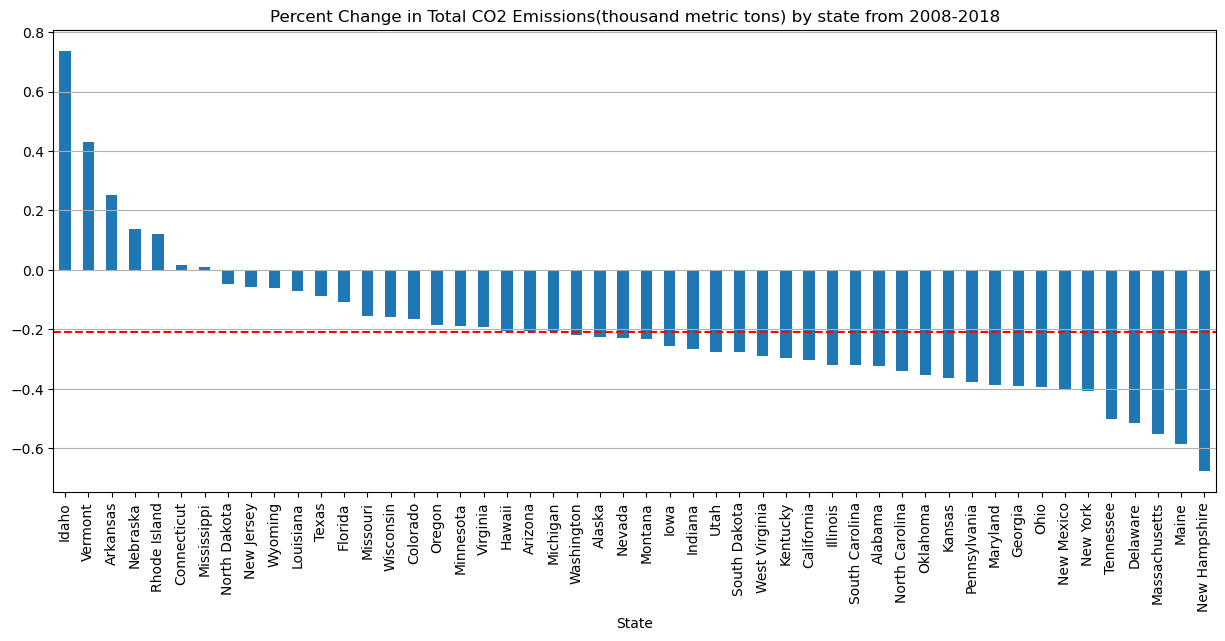

In [86]:
# BAR CHART TO SEE EACH STATE'S PERCENT CHANGE IN NET CO2 EMISSIONS OVER TIME PERIOD
# ADD A LINE TO VISUALIZE THE MEAN

df_combinded_state_key_stats_deltas = df_combinded_state_key_stats_deltas.sort_values(by='Percent Change in Total CO2 Emissions (thousand metric tons)', ascending=False)

df_combinded_state_key_stats_deltas.plot(kind = 'bar',x='State' ,y = 'Percent Change in Total CO2 Emissions (thousand metric tons)', title = 'Percent Change in Total CO2 Emissions(thousand metric tons) by state from 2008-2018', grid=False, figsize= [15,6], legend=False).grid(axis='y')

plt.axhline(y= np.nanmean(df_combinded_state_key_stats_deltas['Percent Change in Total CO2 Emissions (thousand metric tons)']), color = 'red', linestyle = '--')

plt.show()

In [24]:
# CHECK TO MAKE SURE DATA IS EQUAL ACROSS STATES

display(df_state_key_stats.groupby('State').count())

,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
State,,,,,
Alabama,11,11,11,11,11
Alaska,11,11,11,11,11
Arizona,11,11,11,11,11
Arkansas,11,11,11,11,11
California,11,11,11,11,11
Colorado,11,11,11,11,11
Connecticut,11,11,11,11,11
Delaware,11,11,11,11,11
District of Columbia,11,11,11,11,11


In [25]:
# LOOP TO CALL ENERGY PRODUCTION CAPABILITY DATA FROM API

state_production_capability_2008 = []

for x in capacity_api_call_2008['response']['data']:
    production_capability = x['capability']
    state = x['stateDescription']
    period = x['period']
    energy_source = x['energySourceDescription']
    producer_type = x['producerTypeDescription']
    
    state_production_capability_2008.append({"Production Capability (MW)": production_capability,
                                        'State': state,
                                        'Year': period,
                                        'Energy Source': energy_source,
                                        'Producer Type': producer_type
        })

state_production_capability_2018 = []
    
for x in capacity_api_call_2018['response']['data']:
    production_capability = x['capability']
    state = x['stateDescription']
    period = x['period']
    energy_source = x['energySourceDescription']
    producer_type = x['producerTypeDescription']
    
    state_production_capability_2018.append({"Production Capability (MW)": production_capability,
                                        'State': state,
                                        'Year': period,
                                        'Energy Source': energy_source,
                                        'Producer Type': producer_type
        })

In [26]:
# CREATE DF FROM PULLED API DATA FOR 2008

df_state_production_capability_2008 = pd.DataFrame(state_production_capability_2008)

#df_state_production_capability = df_state_production_capability.loc[df_state_production_capability['Year']==2012]
df_state_production_capability_2008

,Production Capability (MW),State,Year,Energy Source,Producer Type
0,3350.8,Delaware,2008,All,All sectors
1,1083.0,Delaware,2008,Coal,All sectors
2,1397.0,Delaware,2008,Natural Gas,All sectors
3,1090.0,Delaware,2008,Natural Gas - CC,All sectors
4,171.0,Delaware,2008,Natural Gas - GT,All sectors
...,...,...,...,...,...
759,1309.4,New Jersey,2008,Petroleum - GT,All sectors
760,14.0,New Jersey,2008,Petroleum - IC,All sectors
761,190.8,New Jersey,2008,Petroleum - ST,All sectors
762,400.0,New Jersey,2008,Pumped Storage,All sectors


In [27]:
# CREATE DF FROM PULLED API DATA FOR 2018

df_state_production_capability_2018 = pd.DataFrame(state_production_capability_2018)
df_state_production_capability_2018

,Production Capability (MW),State,Year,Energy Source,Producer Type
0,18842.2,Iowa,2018,All,All sectors
1,1.1,Iowa,2018,Battery,All sectors
2,5371.7,Iowa,2018,Coal,All sectors
3,146.4,Iowa,2018,Hydroelectric,All sectors
4,3580.7,Iowa,2018,Natural Gas,All sectors
...,...,...,...,...,...
894,1408.6,New York,2018,Pumped Storage,All sectors
895,264.5,New York,2018,Solar,All sectors
896,264.5,New York,2018,Solar - PV,All sectors
897,1985.7,New York,2018,Wind,All sectors


In [28]:
# REMOVE ENERGY SOURCE SUBCATEGORIES FOR 2008

df_agg_production_capability_2008 = df_state_production_capability_2008.drop(df_state_production_capability_2008[df_state_production_capability_2008['Energy Source'].str.contains('-')].index,inplace=False)

In [29]:
# REMOVE ENERGY SOURCE SUBCATEGORIES FOR 2018

df_agg_production_capability_2018 = df_state_production_capability_2018.drop(df_state_production_capability_2018[df_state_production_capability_2018['Energy Source'].str.contains('-')].index,inplace=False)
df_agg_production_capability_2018

,Production Capability (MW),State,Year,Energy Source,Producer Type
0,18842.2,Iowa,2018,All,All sectors
1,1.1,Iowa,2018,Battery,All sectors
2,5371.7,Iowa,2018,Coal,All sectors
3,146.4,Iowa,2018,Hydroelectric,All sectors
4,3580.7,Iowa,2018,Natural Gas,All sectors
...,...,...,...,...,...
890,3558.8,New York,2018,Petroleum,All sectors
894,1408.6,New York,2018,Pumped Storage,All sectors
895,264.5,New York,2018,Solar,All sectors
897,1985.7,New York,2018,Wind,All sectors


In [56]:
# CREATE FOR LOOP TO ONLY PULL KEY STATES FOR ANALYSIS FOR 2008

states_comparison = ['Hawaii', 'Vermont', 'Wyoming', 'Michigan', 'Louisiana', 'Massachusetts', 'West Virginia', 'South Dakota', 'Idaho']

df_2008_filtered_state = []

for state in states_comparison: 
    df_2008_state_comparison = df_agg_production_capability_2008.query("State == @state")
    df_2008_filtered_state.append(df_2008_state_comparison)
    
df_2008_filtered_state = pd.concat(df_2008_filtered_state)
df_2008_filtered_state

,Production Capability (MW),State,Year,Energy Source,Producer Type
47,2436.7,Hawaii,2008,All,All sectors
48,180.0,Hawaii,2008,Coal,All sectors
49,31.0,Hawaii,2008,Geothermal,All sectors
50,23.7,Hawaii,2008,Hydroelectric,All sectors
51,108.6,Hawaii,2008,Other Biomass,All sectors
...,...,...,...,...,...
188,805.0,Idaho,2008,Natural Gas,All sectors
191,14.8,Idaho,2008,Other,All sectors
192,5.4,Idaho,2008,Petroleum,All sectors
194,117.0,Idaho,2008,Wind,All sectors


In [57]:
# REMOVE 'ALL' CATEGORY IN ENERGY SOURCE COLUMN FOR 2008 DF

df_2008_filtered_state_no_all = df_2008_filtered_state.drop(df_2008_filtered_state[df_2008_filtered_state['Energy Source'].str.contains('All')].index,inplace=False)

df_2008_filtered_state_no_all

df_2008_filtered_state_no_all['Proportion of Production'] = df_2008_filtered_state_no_all.groupby(['State'])['Production Capability (MW)'].transform(lambda x: x/x.sum())

df_2008_filtered_state_no_all

,Production Capability (MW),State,Year,Energy Source,Producer Type,Proportion of Production
48,180.0,Hawaii,2008,Coal,All sectors,0.073870
49,31.0,Hawaii,2008,Geothermal,All sectors,0.012722
50,23.7,Hawaii,2008,Hydroelectric,All sectors,0.009726
51,108.6,Hawaii,2008,Other Biomass,All sectors,0.044568
52,9.0,Hawaii,2008,Other Gas,All sectors,0.003694
...,...,...,...,...,...,...
188,805.0,Idaho,2008,Natural Gas,All sectors,0.238342
191,14.8,Idaho,2008,Other,All sectors,0.004382
192,5.4,Idaho,2008,Petroleum,All sectors,0.001599
194,117.0,Idaho,2008,Wind,All sectors,0.034641


In [58]:
# CREATE FOR LOOP TO ONLY PULL KEY STATES FOR ANALYSIS FOR 2018


df_2018_filtered_state = []

for state in states_comparison: 
    df_2018_state_comparison = df_agg_production_capability_2018.query("State == @state")
    df_2018_filtered_state.append(df_2018_state_comparison)
    
df_2018_filtered_state = pd.concat(df_2018_filtered_state)
df_2018_filtered_state


,Production Capability (MW),State,Year,Energy Source,Producer Type
325,2811.4,Hawaii,2018,All,All sectors
326,61.0,Hawaii,2018,Battery,All sectors
327,180.0,Hawaii,2018,Coal,All sectors
569,43.0,Hawaii,2018,Geothermal,All sectors
570,25.9,Hawaii,2018,Hydroelectric,All sectors
...,...,...,...,...,...
27,23.1,Idaho,2018,Other Biomass,All sectors
28,5.4,Idaho,2018,Petroleum,All sectors
30,240.0,Idaho,2018,Solar,All sectors
32,970.4,Idaho,2018,Wind,All sectors


In [59]:
# REMOVE 'ALL' CATEGORY IN ENERGY SOURCE COLUMN FOR 2018 DF

df_2018_filtered_state_no_all = df_2018_filtered_state.drop(df_2018_filtered_state[df_2018_filtered_state['Energy Source'].str.contains('All')].index,inplace=False)

df_2018_filtered_state_no_all

df_2018_filtered_state_no_all['Proportion of Production'] = df_2018_filtered_state_no_all.groupby(['State'])['Production Capability (MW)'].transform(lambda x: x/x.sum())

df_2018_filtered_state_no_all

,Production Capability (MW),State,Year,Energy Source,Producer Type,Proportion of Production
326,61.0,Hawaii,2018,Battery,All sectors,0.021697
327,180.0,Hawaii,2018,Coal,All sectors,0.064025
569,43.0,Hawaii,2018,Geothermal,All sectors,0.015295
570,25.9,Hawaii,2018,Hydroelectric,All sectors,0.009212
571,26.6,Hawaii,2018,Other,All sectors,0.009461
...,...,...,...,...,...,...
27,23.1,Idaho,2018,Other Biomass,All sectors,0.004433
28,5.4,Idaho,2018,Petroleum,All sectors,0.001036
30,240.0,Idaho,2018,Solar,All sectors,0.046062
32,970.4,Idaho,2018,Wind,All sectors,0.186243


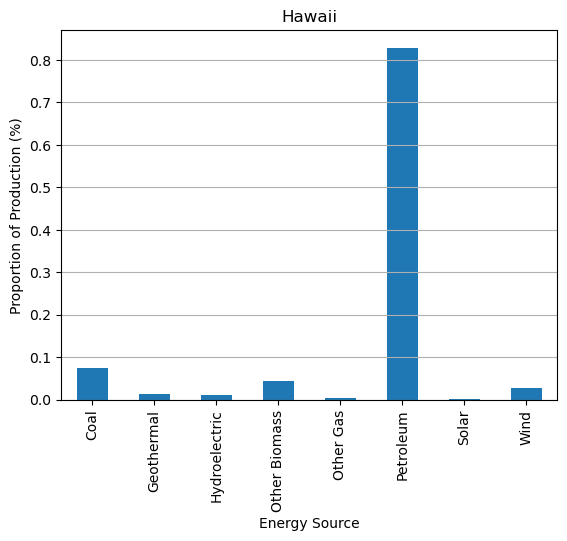

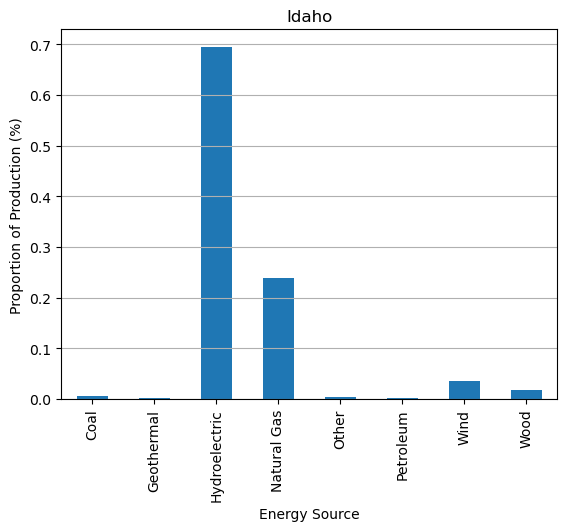

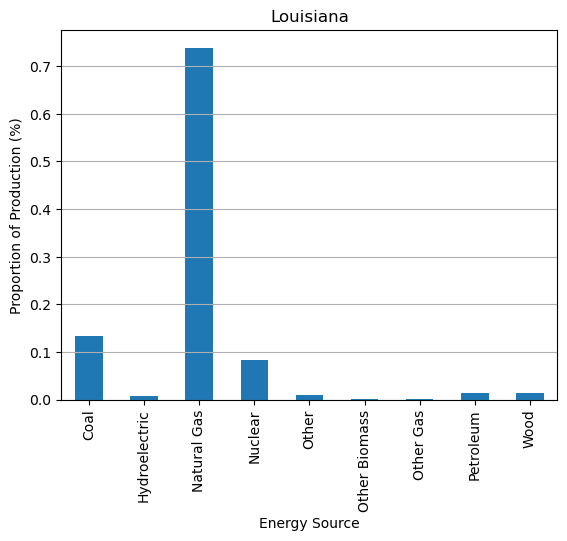

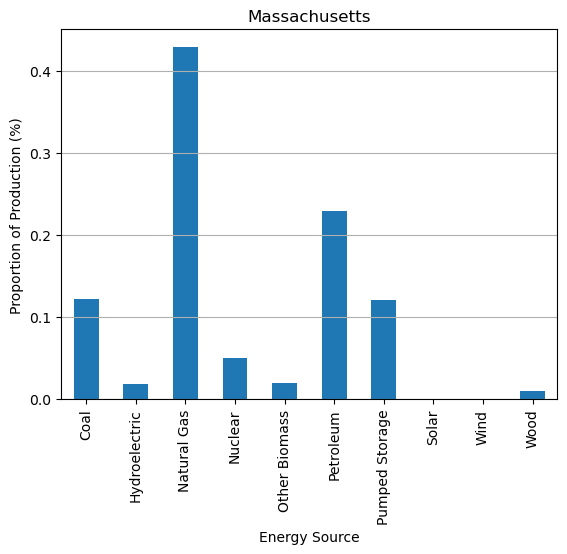

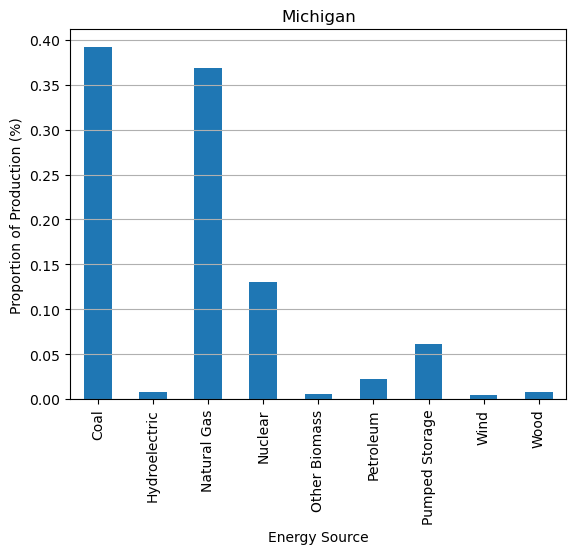

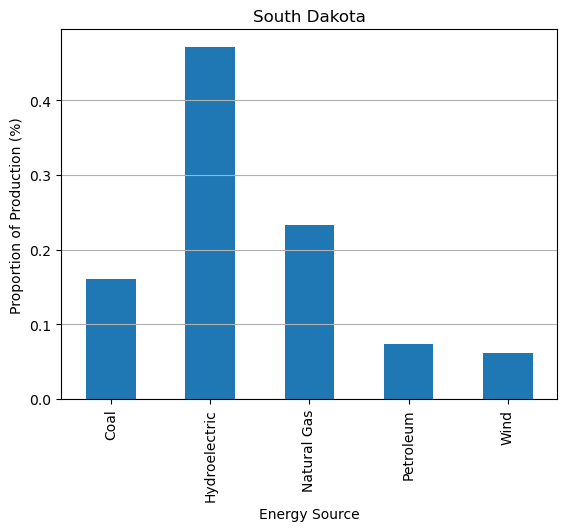

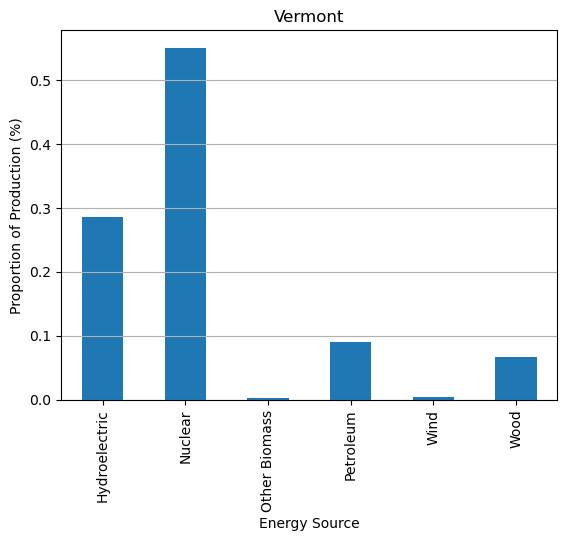

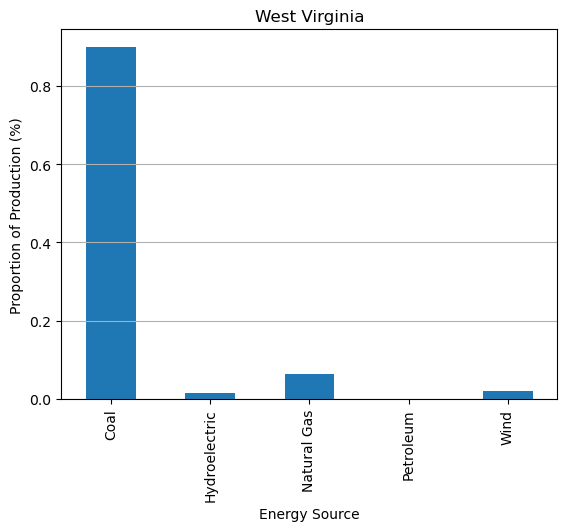

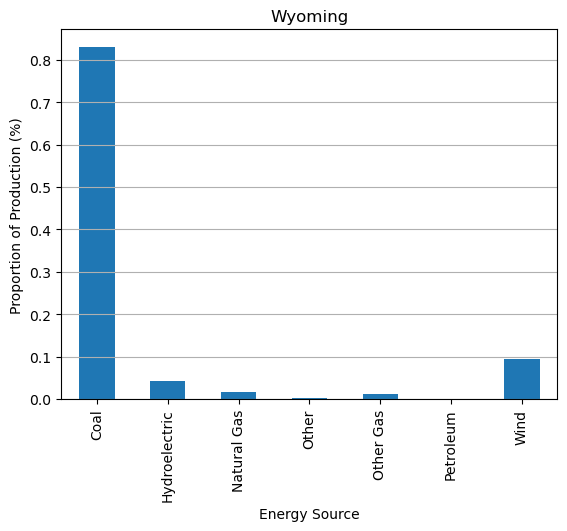

In [62]:
# BAR CHART FOR EACH STATE IN 2008 TO SHOW PROPORTION OF PRODUCTION BY ENERGY SOURCE

for title, group in df_2008_filtered_state_no_all.groupby('State'):
    df_2008_filtered_state_no_all_bar = group.plot(kind='bar', x='Energy Source', y='Proportion of Production', title = title, sharey = True, ylabel='Proportion of Production (%)', legend=False, sort_columns = True).grid(axis='y')
    plt.show()

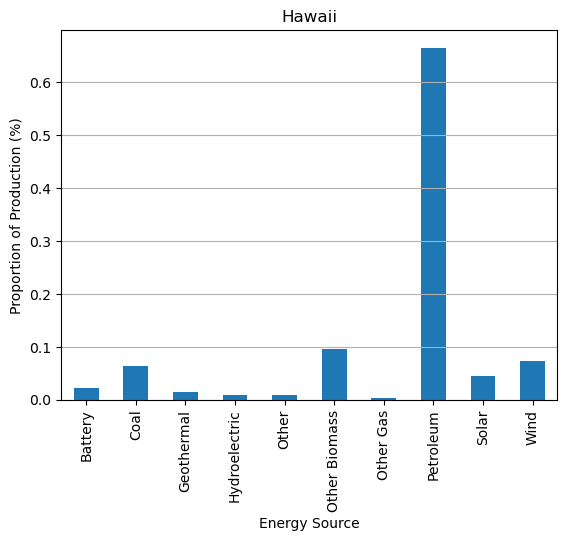

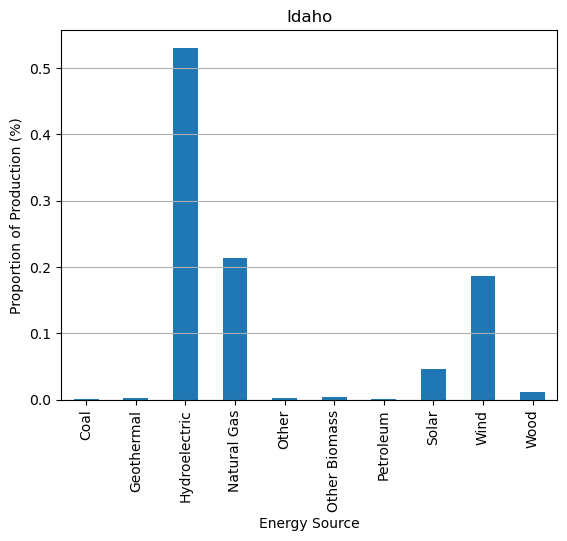

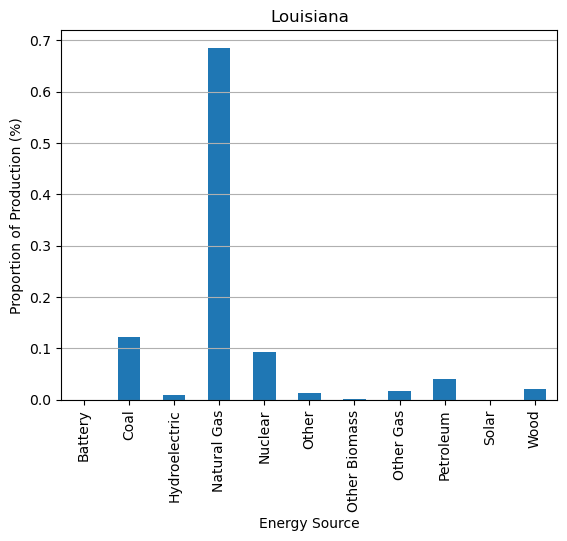

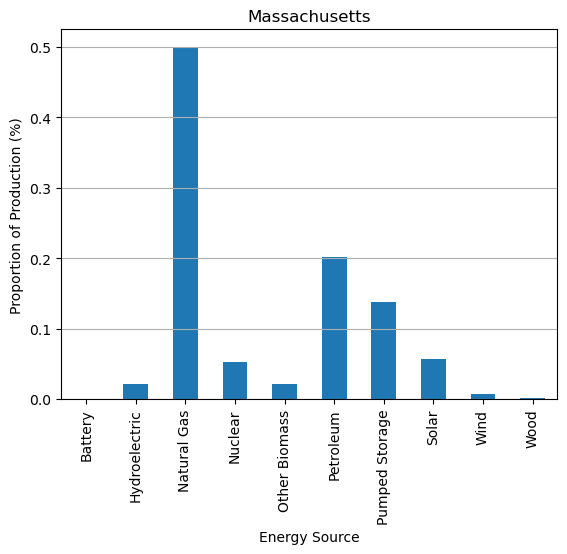

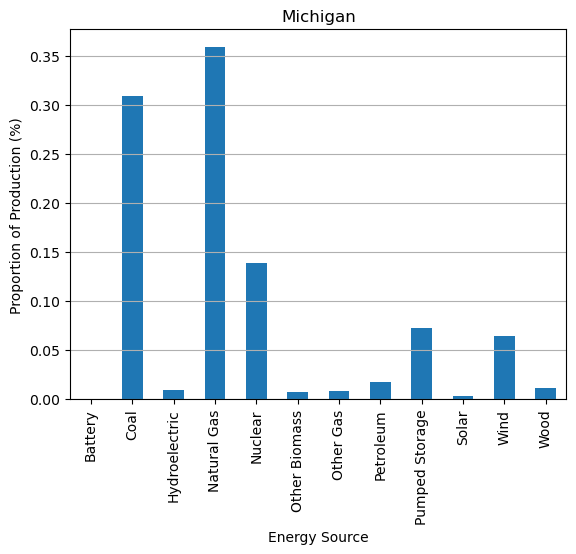

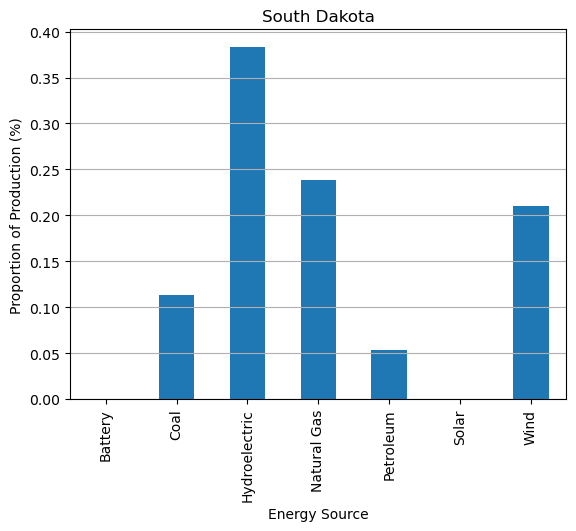

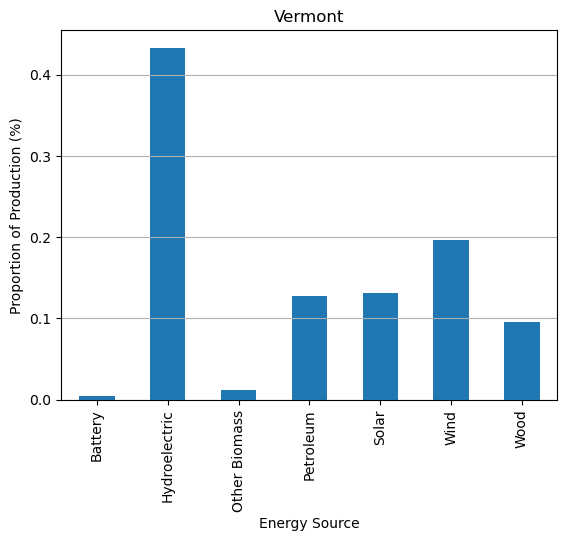

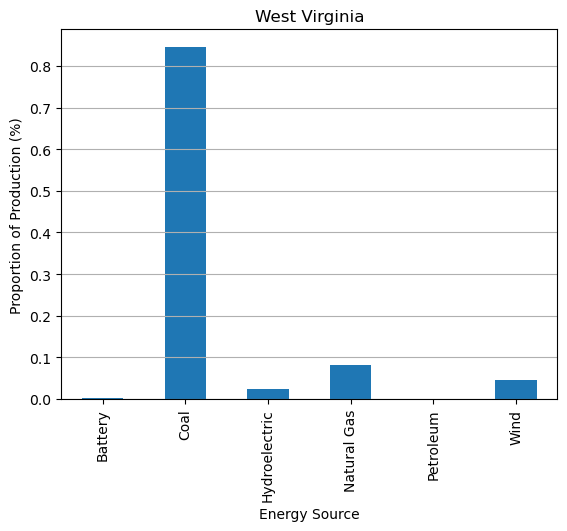

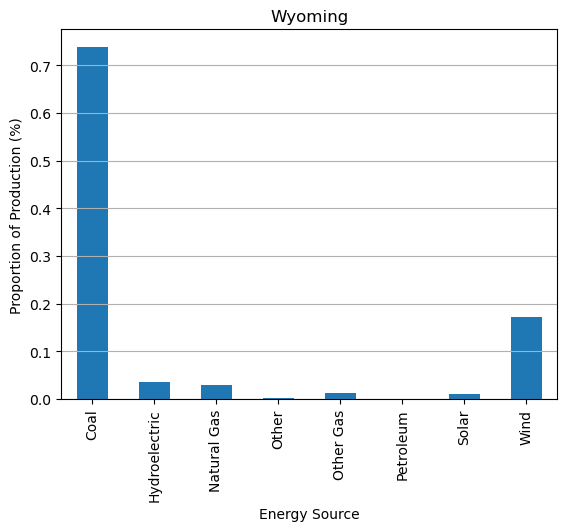

In [63]:
# BAR CHART FOR EACH STATE IN 2018 TO SHOW PROPORTION OF PRODUCTION BY ENERGY SOURCE

for title, group in df_2018_filtered_state_no_all.groupby('State'):
    df_2018_filtered_state_no_all_bar = group.plot(kind='bar', x='Energy Source', y='Proportion of Production', title = title, sharey = True, ylabel='Proportion of Production (%)', legend=False, sort_columns = True).grid(axis='y')
    plt.show()

In [74]:
# FIND THE CHANGE AND PERCENT CHANGE IN BOTH PRODUCTION CAPABILITY AND PROPORTION OF PRODUCTION

df_2008_filtered_state_no_all = df_2008_filtered_state.drop(df_2008_filtered_state[df_2008_filtered_state['Energy Source'].str.contains('All')].index,inplace=False)

df_2008_filtered_state_no_all['Proportion of Production'] = df_2008_filtered_state_no_all.groupby(['State'])['Production Capability (MW)'].transform(lambda x: x/x.sum())

df_2018_filtered_state_no_all = df_2018_filtered_state.drop(df_2018_filtered_state[df_2018_filtered_state['Energy Source'].str.contains('All')].index,inplace=False)

df_2018_filtered_state_no_all['Proportion of Production'] = df_2018_filtered_state_no_all.groupby(['State'])['Production Capability (MW)'].transform(lambda x: x/x.sum())

df_filtered_state_no_all = pd.merge(df_2008_filtered_state_no_all, df_2018_filtered_state_no_all, on = ['State', 'Energy Source'], how = 'outer')
df_filtered_state_no_all = df_filtered_state_no_all.fillna(0)

df_filtered_state_no_all.drop(columns = ['Year_x', 'Producer Type_x', 'Year_y', 'Producer Type_y'], inplace=True)

df_filtered_state_no_all = df_filtered_state_no_all.assign(Change_in_Proportion = lambda x: x['Proportion of Production_y'] - x['Proportion of Production_x'])

df_filtered_state_no_all = df_filtered_state_no_all.assign(Change_in_Production_Capability = lambda x: x['Production Capability (MW)_y'] - x['Production Capability (MW)_x'])

df_filtered_state_no_all.rename(columns = {'Production Capability (MW)_x': '2008 Production Capability (MW)',
                                           'Proportion of Production_x': '2008 Proportion of Production',
                                           'Production Capability (MW)_y': '2018 Production Capability (MW)',
                                           'Proportion of Production_y': '2018 Proportion of Production',
                                           'Change_in_Proportion': 'Percent Change in Proportion',
                                           'Change_in_Production_Capability': 'Change in Production Capability (MW)'}
                                
                                ,inplace=True)

df_filtered_state_no_all= df_filtered_state_no_all[['State','Energy Source', '2008 Production Capability (MW)','2018 Production Capability (MW)', 'Change in Production Capability (MW)', '2008 Proportion of Production','2018 Proportion of Production', 'Percent Change in Proportion']]

df_filtered_state_no_all.sort_values('Percent Change in Proportion', inplace=True, ascending=False)
df_filtered_state_no_all.sort_values('State', inplace=True)
df_filtered_state_no_all.reset_index(inplace=True,drop=True)
df_filtered_state_no_all

,State,Energy Source,2008 Production Capability (MW),2018 Production Capability (MW),Change in Production Capability (MW),2008 Proportion of Production,2018 Proportion of Production,Percent Change in Proportion
0,Hawaii,Other Gas,9.0,6.4,-2.6,0.003694,0.002276,-0.001417
1,Hawaii,Battery,0.0,61.0,61.0,0.000000,0.021697,0.021697
2,Hawaii,Coal,180.0,180.0,0.0,0.073870,0.064025,-0.009845
3,Hawaii,Wind,63.8,205.6,141.8,0.026183,0.073131,0.046948
4,Hawaii,Other Biomass,108.6,266.9,158.3,0.044568,0.094935,0.050366
...,...,...,...,...,...,...,...,...
78,Wyoming,Wind,680.4,1487.3,806.9,0.095234,0.171484,0.076250
79,Wyoming,Coal,5931.9,6406.0,474.1,0.830275,0.738606,-0.091669
80,Wyoming,Other,11.5,12.4,0.9,0.001610,0.001430,-0.000180
81,Wyoming,Natural Gas,119.5,260.5,141.0,0.016726,0.030035,0.013309


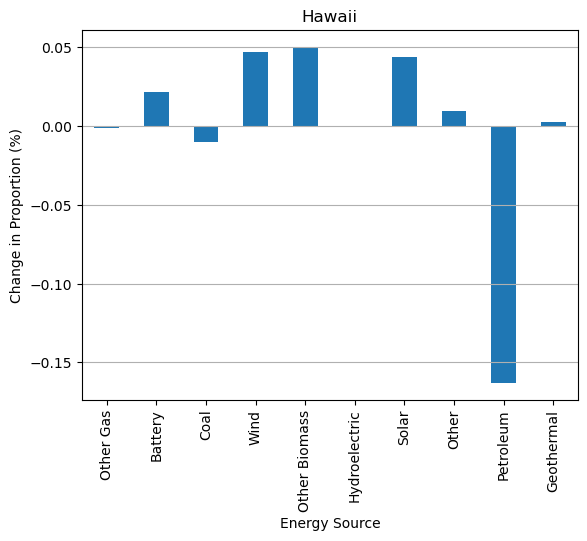

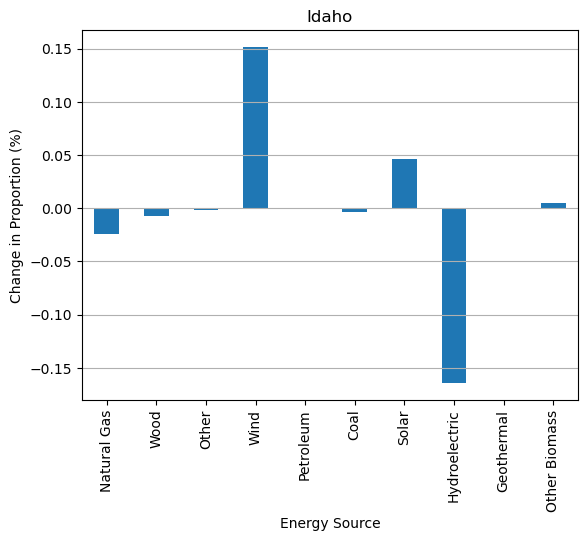

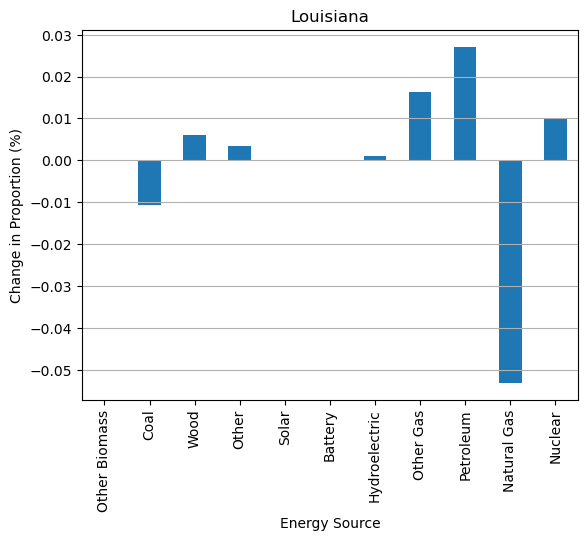

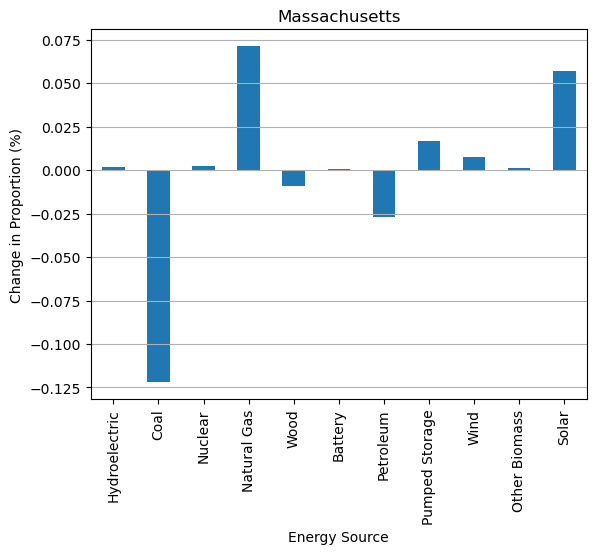

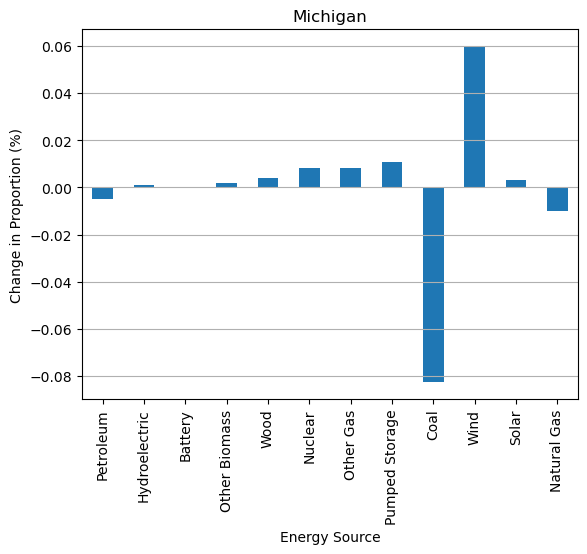

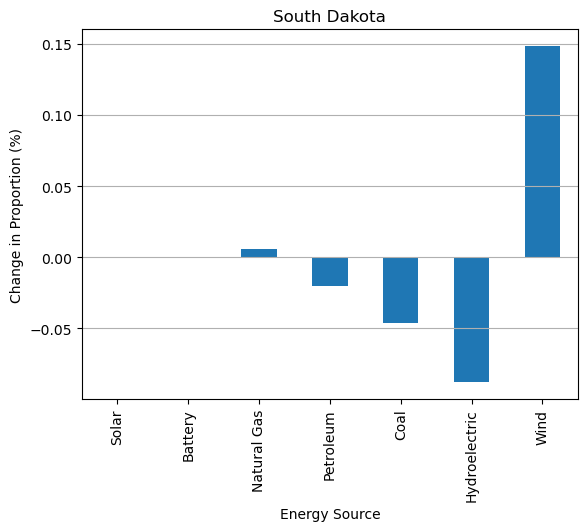

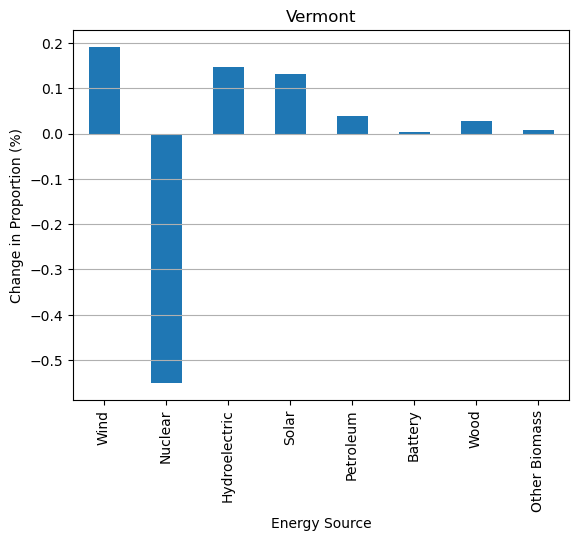

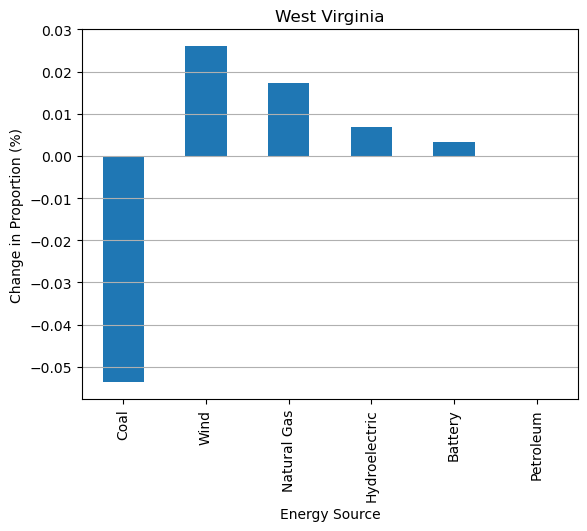

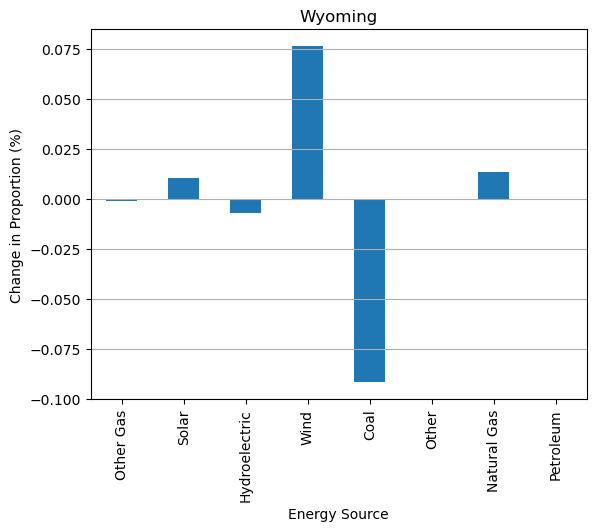

In [65]:
# CREATE BAR CHARTS FOR EACH STATE OF INTEREST TO SHOWCASE THE PERCENT CHANGE IN PROPORTION OF PRODUCTION BY ENERGY SOURCE

for title, group in df_filtered_state_no_all.groupby('State'):
    df_filtered_state_no_all = group.plot(kind='bar', x='Energy Source', y='Change in Proportion', title = title, ylabel='Change in Proportion (%)', legend=False, sort_columns = True).grid(axis='y')
    plt.show()